**3 kinds of Naive Bayes Classifiers:<br>**
*GaussianNB(consistent data) store the average and the value of standard deviation<br>*
*BernoulliNB(binary classifier)<br>*
*MultinomialNB(counting data) count the average value<br>*
the last two classifiers are mostly used in the classification of text data


In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

In [2]:
# BernoulliNB calculates the quantity of elements whose feature!=0 in each classification
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

4 data points with 4 features , 2 classes

In [3]:
counts = {}
for label in np.unique(y):
    # count the quantity of "1" in each feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [4]:
# decision tree use DesicionTreeRegressor and DecisionTreeClassifier in scikit-learn
# apply pre-pruning on breast cancer datasets
# default case: decision tree will grow to pure leaves state
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accurary on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accurary on test set: 0.937


**the training score = 100 because the tree in the pure leaves state and it's very deep**<br>
now we apply pre-pruning

In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accurary on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accurary on test set: 0.951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

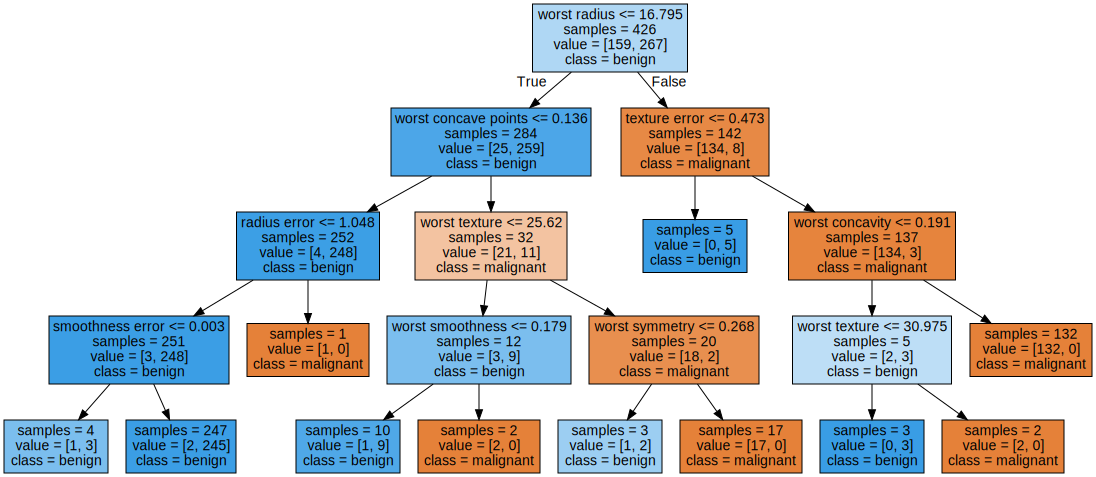

In [7]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [8]:
# feature importances
# higher score relates to better prediction
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


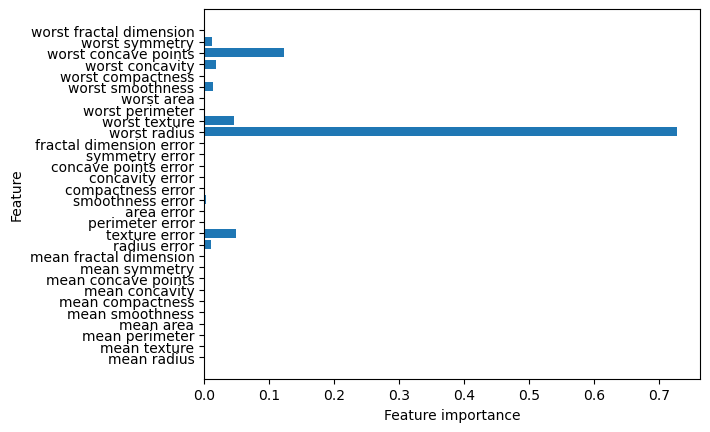

In [10]:
# visualize the feature importances
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


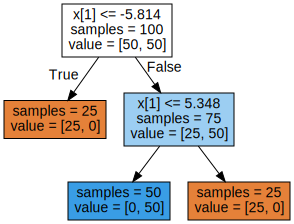

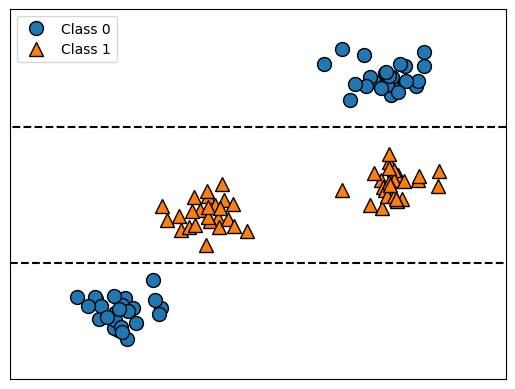

In [11]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

**as for DecisionTreeRegressor**<br>
DTR cannot extrapolate(外推) and cannot predict beyond the train set